In [4]:

import re,glob,os,json,copy
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.patheffects as path_effects
from matplotlib.gridspec import GridSpec

from scipy.stats import gaussian_kde

import baltic as bt

typeface='Helvetica Neue'
mpl.rcParams['font.weight']=300
mpl.rcParams['axes.labelweight']=300
mpl.rcParams['font.family']=typeface
mpl.rcParams['font.size']=22
mpl.rcParams['pdf.fonttype']=42


Processing segment: Genome
Processing segment: Spike
Processing segment: HE
Processing segment: N
Processing segment: M


/var/folders/tm/hjf14whs1xz0p1vxx3r7s95c0000gp/T/ipykernel_4442/1140197724.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


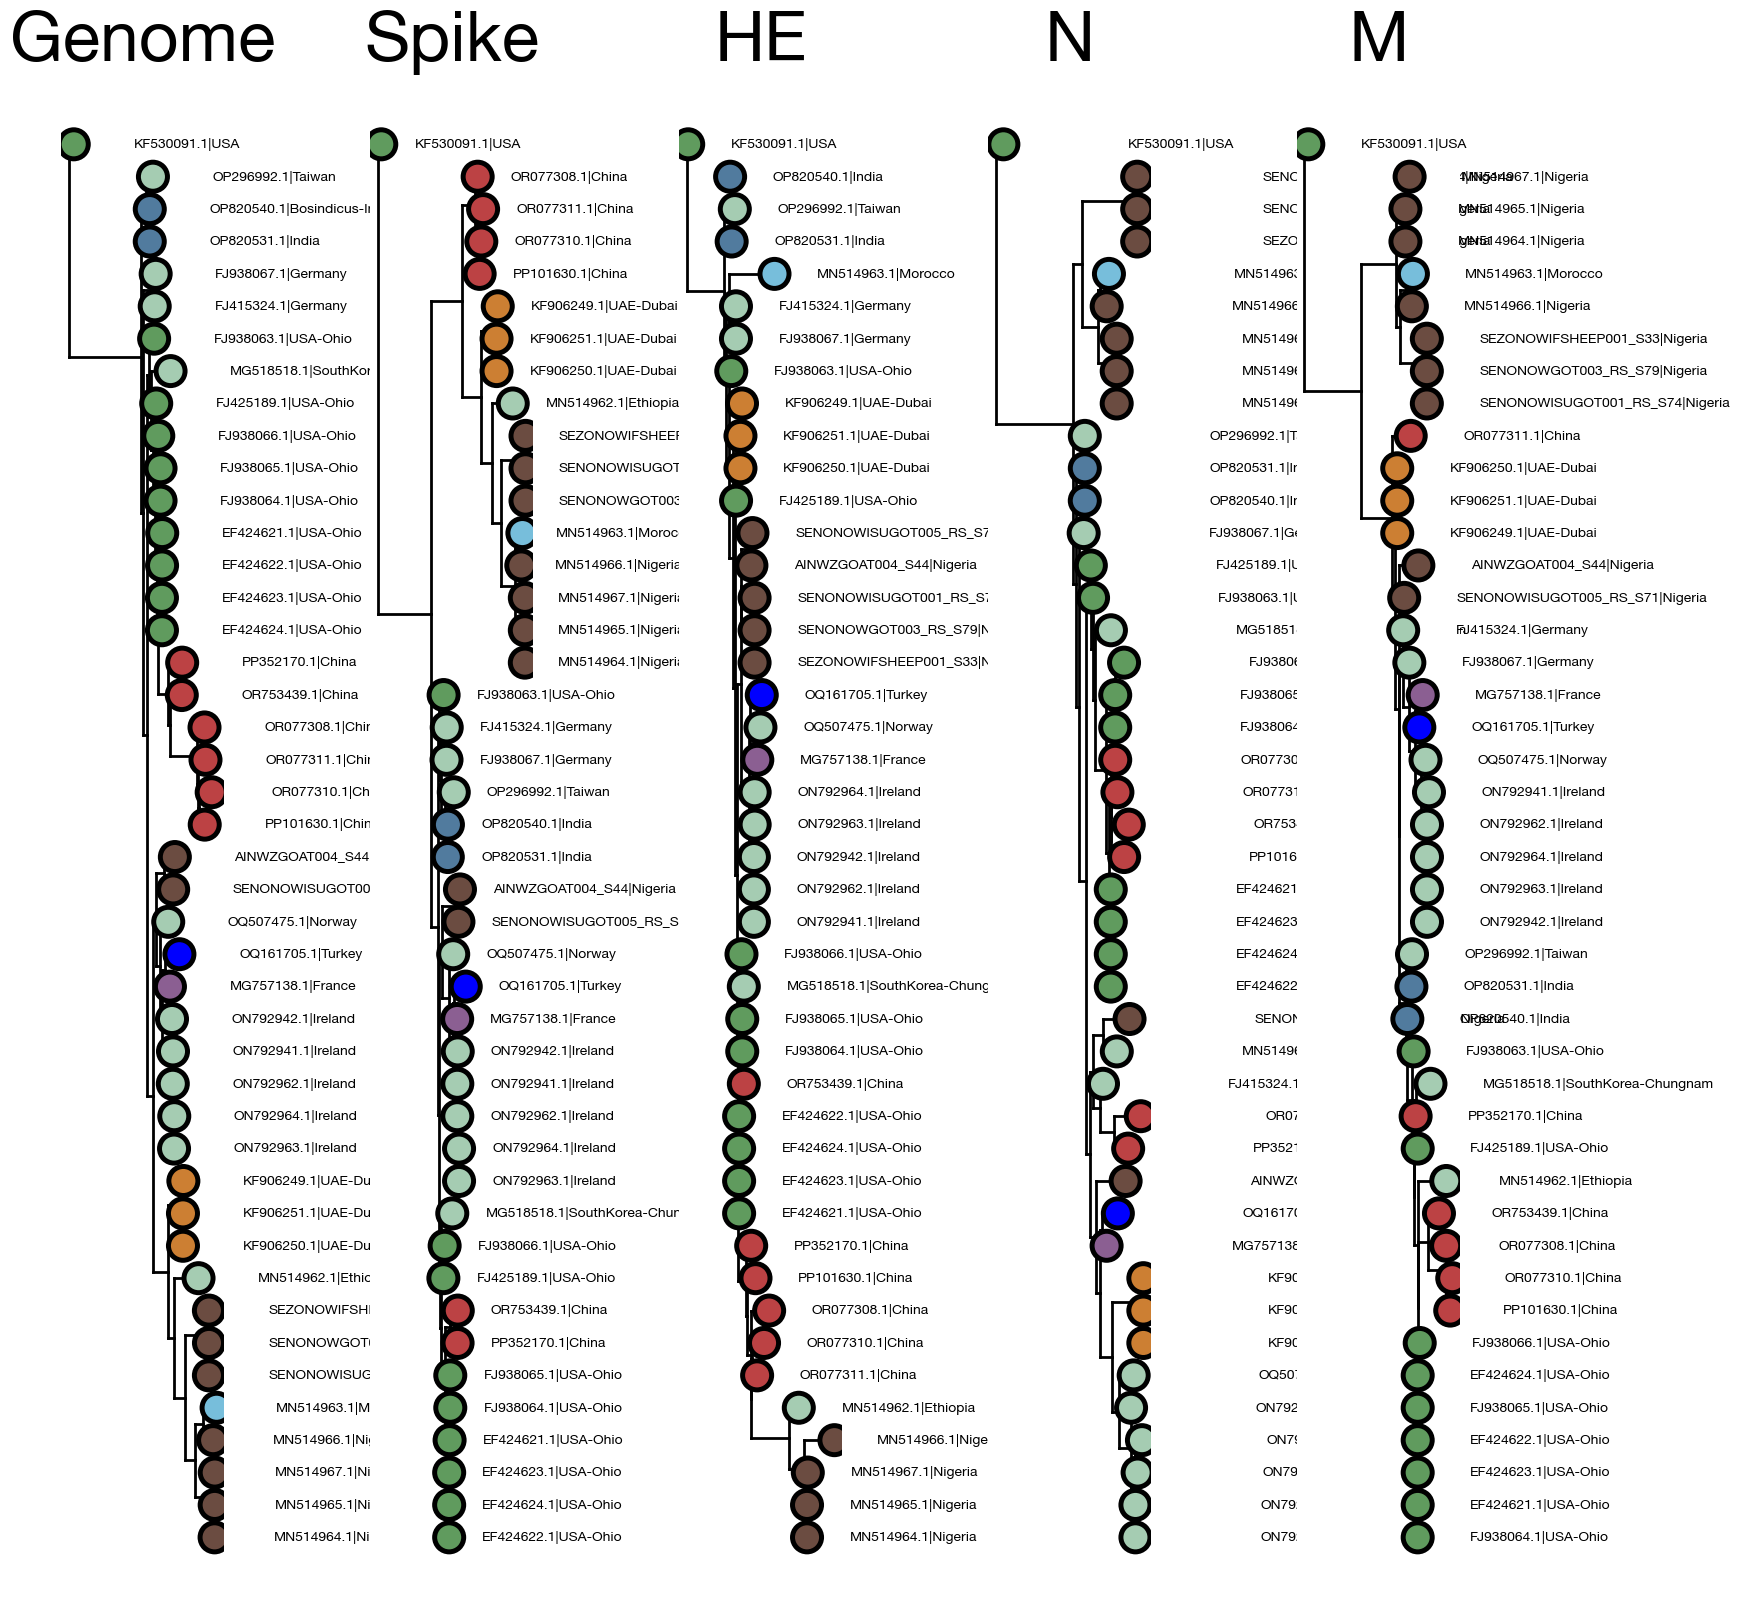

In [24]:
import os
import glob
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import gridspec

# Base directory where your rooted trees are stored
base_path = './Downloads/BCOV/'

# List of segments/filenames (without extension)
segments = ['Genome', 'Spike', 'HE', 'N', 'M']

# Define colours for tip annotation based on some expected key in tip names.
tip_colours = {
    'China': '#bc4244',  # Hubei
    'Bosindicus-India': '#517b9e',
    'India': '#517b9e',
    'USA': '#609b5e',
    'USA-Ohio': '#609b5e',
    'Nigeria': '#6b4c41',
    'France': '#8b5f92',
    'UAE-Dubai': '#cc7f33',
    'Morocco': '#77BEDB',
    'Taiwan': '#A5CCB2',
    'Germany': '#A5CCB2',
    'Ireland': '#A5CCB2',
    'Norway': '#A5CCB2',
    'SouthKorea-Chungnam': '#A5CCB2',
    'Turkey': "blue",
    'Ethiopia': '#A5CCB2'
}

# Create a figure with one row and as many columns as segments.
fig = plt.figure(figsize=(30, 30))
gs = gridspec.GridSpec(2, 8, height_ratios=[2, 1], wspace=0.9, hspace=0.01)  # Setup figure with grid

# Loop through segments, load each rooted tree, sort branches, and plot it.
for t, seg in enumerate(segments):
    tree_path = os.path.join(base_path, f'{seg}.newick')
    print(f"Processing segment: {seg}")
    
    # Create a subplot for this tree
    ax = plt.subplot(gs[0, t])
    
    # Load the rooted tree
    ll = bt.loadNewick(tree_path)
    
    # Sort branches (if needed for a clean plot)
    ll.sortBranches()
    
    # Define coordinate functions.
    # Here we assume that the tree is already rooted and that each node has attributes:
    #   - k.x : branch length (horizontal coordinate)
    #   - k.y : vertical position of the tip/node
    x_attr = lambda k: k.x  # use branch lengths as-is
    y_attr = lambda k: k.y  # use the provided y positions

    # Function to choose tip colour.
    # If the tip name is in the format 'ID|...|Country', split and use the country to pick the colour.
    tip_colour = lambda k: tip_colours.get(k.name.split('|')[2], 'black') if '|' in k.name else 'black'

    # Plot the tree (branch lines)
    ll.plotTree(ax, x_attr=x_attr, y_attr=y_attr, width=2)
    
    # Plot tip points
    ll.plotPoints(ax, x_attr=x_attr, y_attr=y_attr, size=300, colour=tip_colour)
    
    # Add tip labels. A small text_offset is added to the x-coordinate so that the label appears right next to the tip.
    # The text is drawn with a high zorder and clip_on=False to ensure it is visible over adjacent subplots.
    text_offset = 0.05
    ll.addText(ax,
               x_attr=lambda k: k.x + text_offset,
               y_attr=y_attr,
               text=lambda k: k.name if '|' not in k.name else f'{k.name.split("|")[0]}|{k.name.split("|")[2]}',
               ha='left', va='center', size=10,
               zorder=1, clip_on=False)
    
    # Optionally add a title for each subplot
    ax.set_title(seg, size=50)
    
    # Clean up the axis appearance
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_yticklabels([])
    for spine in ax.spines.values():
        spine.set_visible(False)

plt.tight_layout()
plt.savefig('/Users/s2059633/Downloads/BCOV/BCOV_Fig1.pdf',bbox_inches='tight',dpi=300)
plt.savefig('/Users/s2059633/Downloads/BCOV/BCOV_Fig1.eps',bbox_inches='tight',dpi=300)
plt.savefig('/Users/s2059633/Downloads/BCOV/BCOV_Fig1.png',bbox_inches='tight',dpi=500)


plt.show()

N

Tree height: 0.040072
Tree length: 0.222862

Numbers of objects in tree: 86 (42 nodes and 44 leaves)

Spike

Tree height: 0.222590
Tree length: 0.613818
strictly bifurcating tree

Numbers of objects in tree: 87 (43 nodes and 44 leaves)

M

Tree height: 0.140936
Tree length: 0.398050
strictly bifurcating tree

Numbers of objects in tree: 87 (43 nodes and 44 leaves)

Spike

Tree height: 0.128733
Tree length: 0.460261

Numbers of objects in tree: 86 (42 nodes and 44 leaves)

M

Tree height: 0.085120
Tree length: 0.317293

Numbers of objects in tree: 86 (42 nodes and 44 leaves)

Genome

Tree height: 0.050729
Tree length: 0.287720

Numbers of objects in tree: 86 (42 nodes and 44 leaves)

HE

Tree height: 0.173509
Tree length: 0.446445
strictly bifurcating tree

Numbers of objects in tree: 87 (43 nodes and 44 leaves)

HE

Tree height: 0.118187
Tree length: 0.395724

Numbers of objects in tree: 86 (42 nodes and 44 leaves)

N

Tree height: 0.059204
Tree length: 0.244623
strictly bifurcating

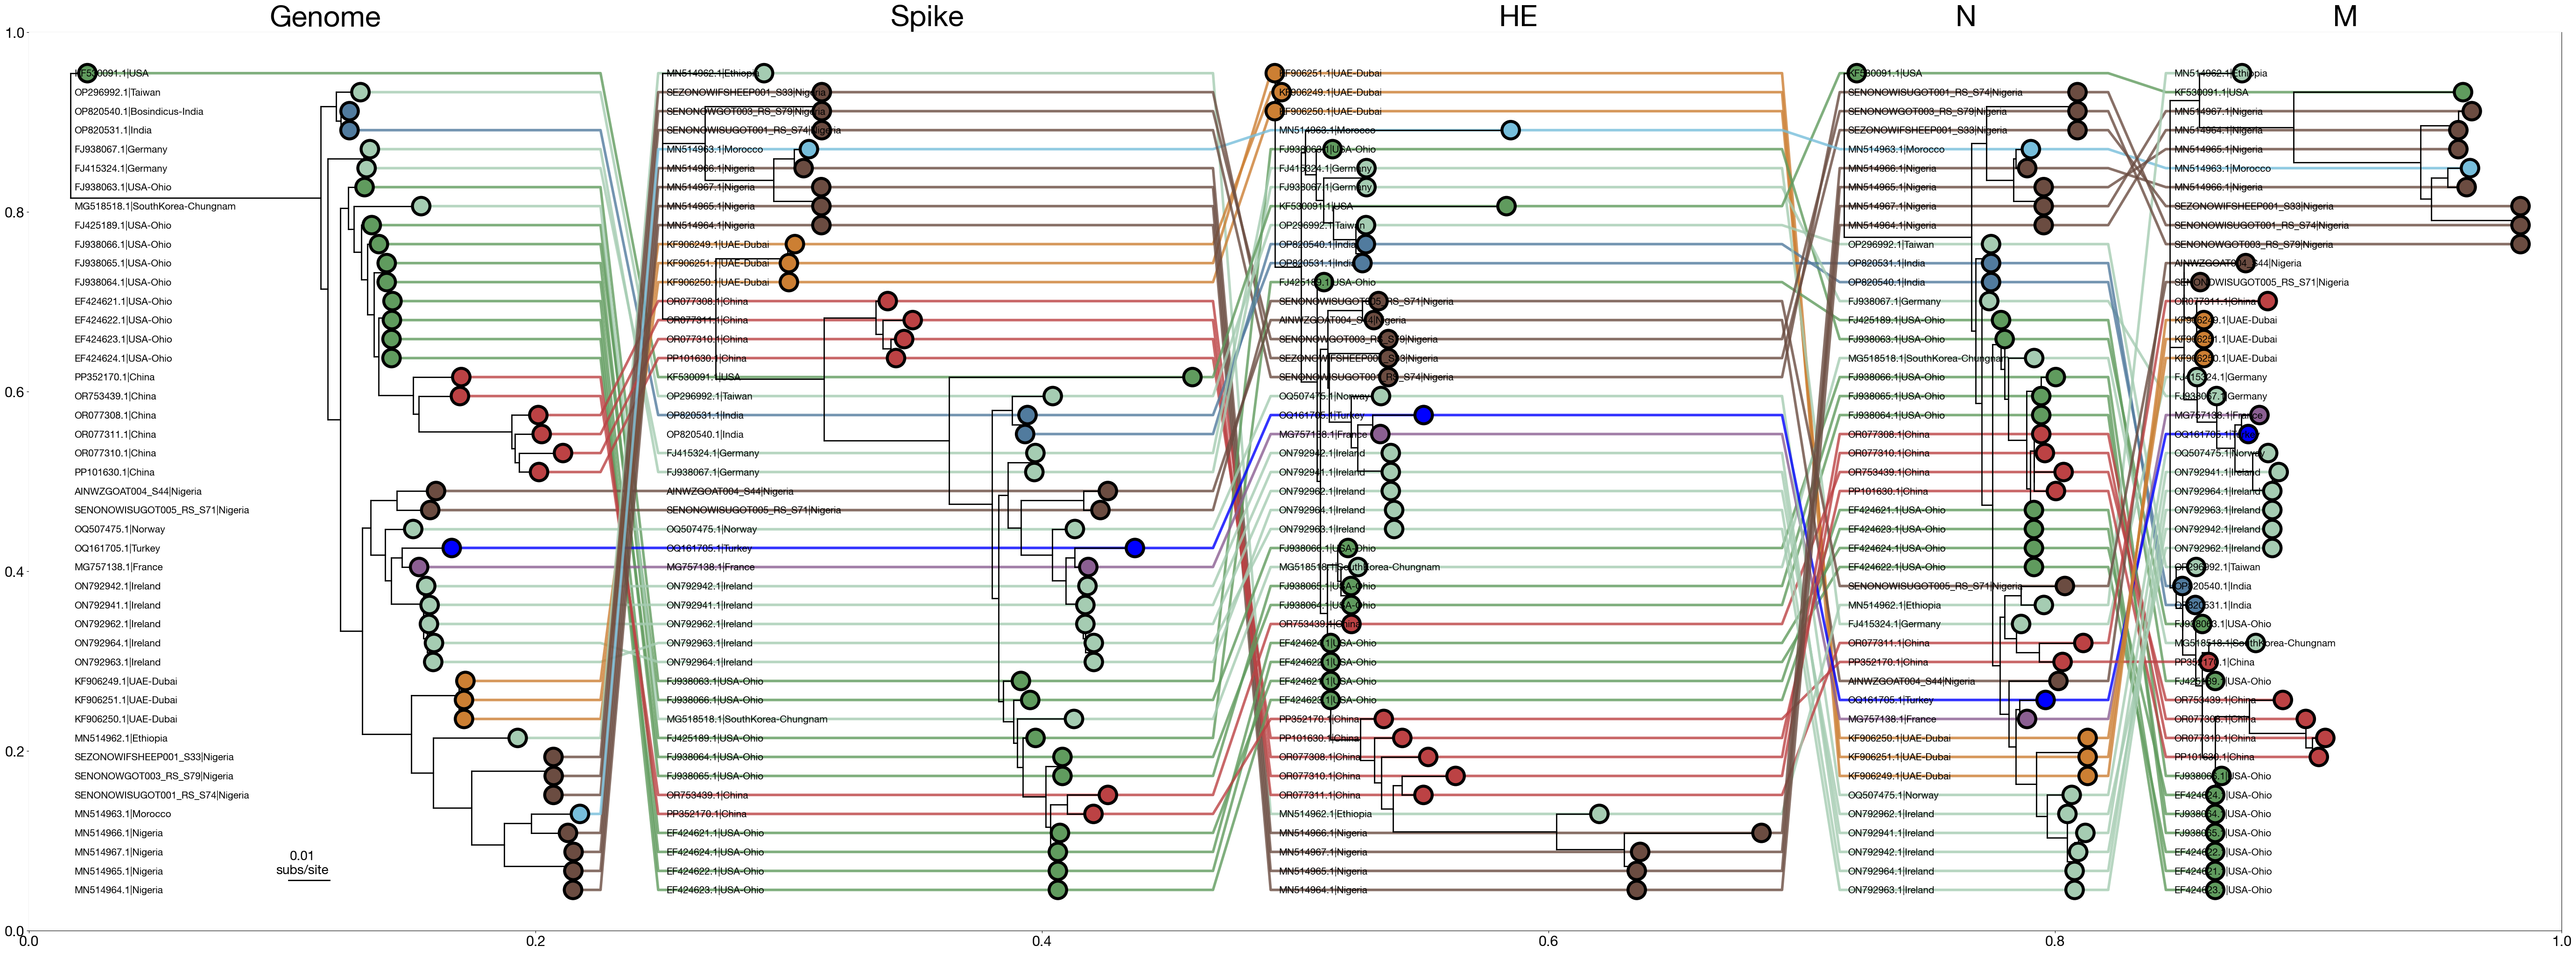

In [7]:
def subplot_tanglegram(ax):
    
    trees={}
#     base_path='/Users/evogytis/Documents/manuscripts/wuhan6-phylodynamics/data/SFig3'
    base_path='./Downloads/BCOV/'
    for tfile in glob.glob(os.path.join(base_path,'*.newick')):
        segment=os.path.basename(tfile).split('.')[0]
        print(segment)
        ll=bt.loadNewick(tfile)
        ll.treeStats()
        ll=ll.collapseBranches(lambda k: k.length==0.0)
        ll=ll.reduceTree([k for k in ll.getExternal() if k.is_leaf() and 'NJ' not in k.name]) ## remove non-public sequences
        ll.sortBranches()
        trees[segment]=ll
    
    order=['Genome','Spike', 'HE', 'N', 'M']

    ys={seg: {k.name: k.y for k in trees[seg].getExternal()} for seg in order}
    
    tip_colours={'China': '#bc4244', ## Hubei
                 'Bosindicus-India': '#517b9e', 
                 'India': '#517b9e',
                 'USA': '#609b5e', 
                 'USA-Ohio': '#609b5e',
                 'Nigeria': '#6b4c41', 
                 'France': '#8b5f92', 
                 'UAE-Dubai': '#cc7f33', 
                 'Morocco': '#77BEDB',
                 'Taiwan': '#A5CCB2',
                'Germany': '#A5CCB2',
                'Ireland': '#A5CCB2',
                'Norway':'#A5CCB2',
                'SouthKorea-Chungnam': '#A5CCB2',
                 'Turkey':"blue",
                'Ethiopia':'#A5CCB2'}
    offset=0
    space=0.02
    
    
    L=0.01
    x=0.053
    y=1
    ax.plot([x,x+L],[y,y],color='k',lw=2)
    ax.text(x+L/3,y+0.2,'%s\nsubs/site'%(L),va='bottom',ha='center',size=20)
    
    for s,seg in enumerate(order):
        ll=trees[seg]
        
        tip_colour=lambda k: tip_colours[k.name.split('|')[2]]

        tallestTree=max([trees[s].ySpan for s in trees])

        x_attr=lambda k: k.x+offset if k.parent else k.x
        y_attr=lambda k: k.y*(tallestTree/ll.ySpan)

        ll.plotTree(ax,x_attr=x_attr,y_attr=y_attr,width=2)
        ll.plotPoints(ax,x_attr=x_attr,y_attr=y_attr,size=500,colour=tip_colour)
        
        ll.addText(ax,x_attr=lambda k: offset+0.001,y_attr=y_attr,text=lambda k: '%s|%s'%(k.name.split('|')[0],k.name.split('|')[2]),ha='left',va='center',size=15)
        
        ax.text(offset+ll.treeHeight/2,tallestTree+2,seg,ha='center',size=45)
        if s<len(order)-1:
            for k in ll.getExternal(lambda q: q.name in [w.name for w in trees[order[s+1]].getExternal()]): ## current tree
                x1=x_attr(k)
                x2=max(map(x_attr,ll.getExternal()))+space*0.25

                counterpart=trees[order[s+1]].getBranches(lambda w: w.branchType=='leaf' and w.name==k.name)
                y1=y_attr(k)
                
                y_attr2=lambda q: q.y*(tallestTree/trees[order[s+1]].ySpan)
                y2=y_attr2(counterpart)

                x3=max(map(x_attr,ll.getExternal()))+space*0.95
                x4=max(map(x_attr,ll.getExternal()))+space+counterpart.x

                ax.plot([x1,x2,x3,x4],[y1,y1,y2,y2],color=tip_colour(k),lw=4,alpha=0.8,zorder=0)

        offset+=ll.treeHeight+space

    
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_yticklabels([])

    [ax.spines[loc].set_visible(False) for loc in ax.spines]
    ax.plot()
    
    ax.set_xlim(-space/2,offset-space*0.5)
    return ax

fig = plt.subplots(figsize=(70,25),facecolor='w')

gs = GridSpec(1, 1,hspace=0.0,wspace=0.0)
ax = plt.subplot(gs[0])

subplot_tanglegram(ax)

# plt.savefig('/Users/evogytis/Documents/manuscripts/wuhan6-phylodynamics/figures/SuppFig3_MLtangle.png',bbox_inches='tight',dpi=300)
# plt.savefig('/Users/evogytis/Documents/manuscripts/wuhan6-phylodynamics/figures/SuppFig3_MLtangle.pdf',bbox_inches='tight',dpi=300)
#plt.savefig('/mnt/c/Users/evogytis/repos/orthomyxo-metagenomics/manuscript/JournalOfVirology-revision1/SuppFig6_MLtangle.png',bbox_inches='tight',dpi=300)
#plt.savefig('/mnt/c/Users/evogytis/repos/orthomyxo-metagenomics/manuscript/JournalOfVirology-revision1/SuppFig6_MLtangle.tiff',bbox_inches='tight',dpi=100)
#plt.savefig('/mnt/c/Users/evogytis/repos/orthomyxo-metagenomics/manuscript/JournalOfVirology-revision1/SuppFig6_MLtangle.pdf',bbox_inches='tight',dpi=300)
#plt.savefig('/mnt/c/Users/evogytis/repos/orthomyxo-metagenomics/manuscript/JournalOfVirology-revision1/SuppFig6_MLtangle.eps',bbox_inches='tight',dpi=300)

plt.show()

Genome
Spike
HE
N
M


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


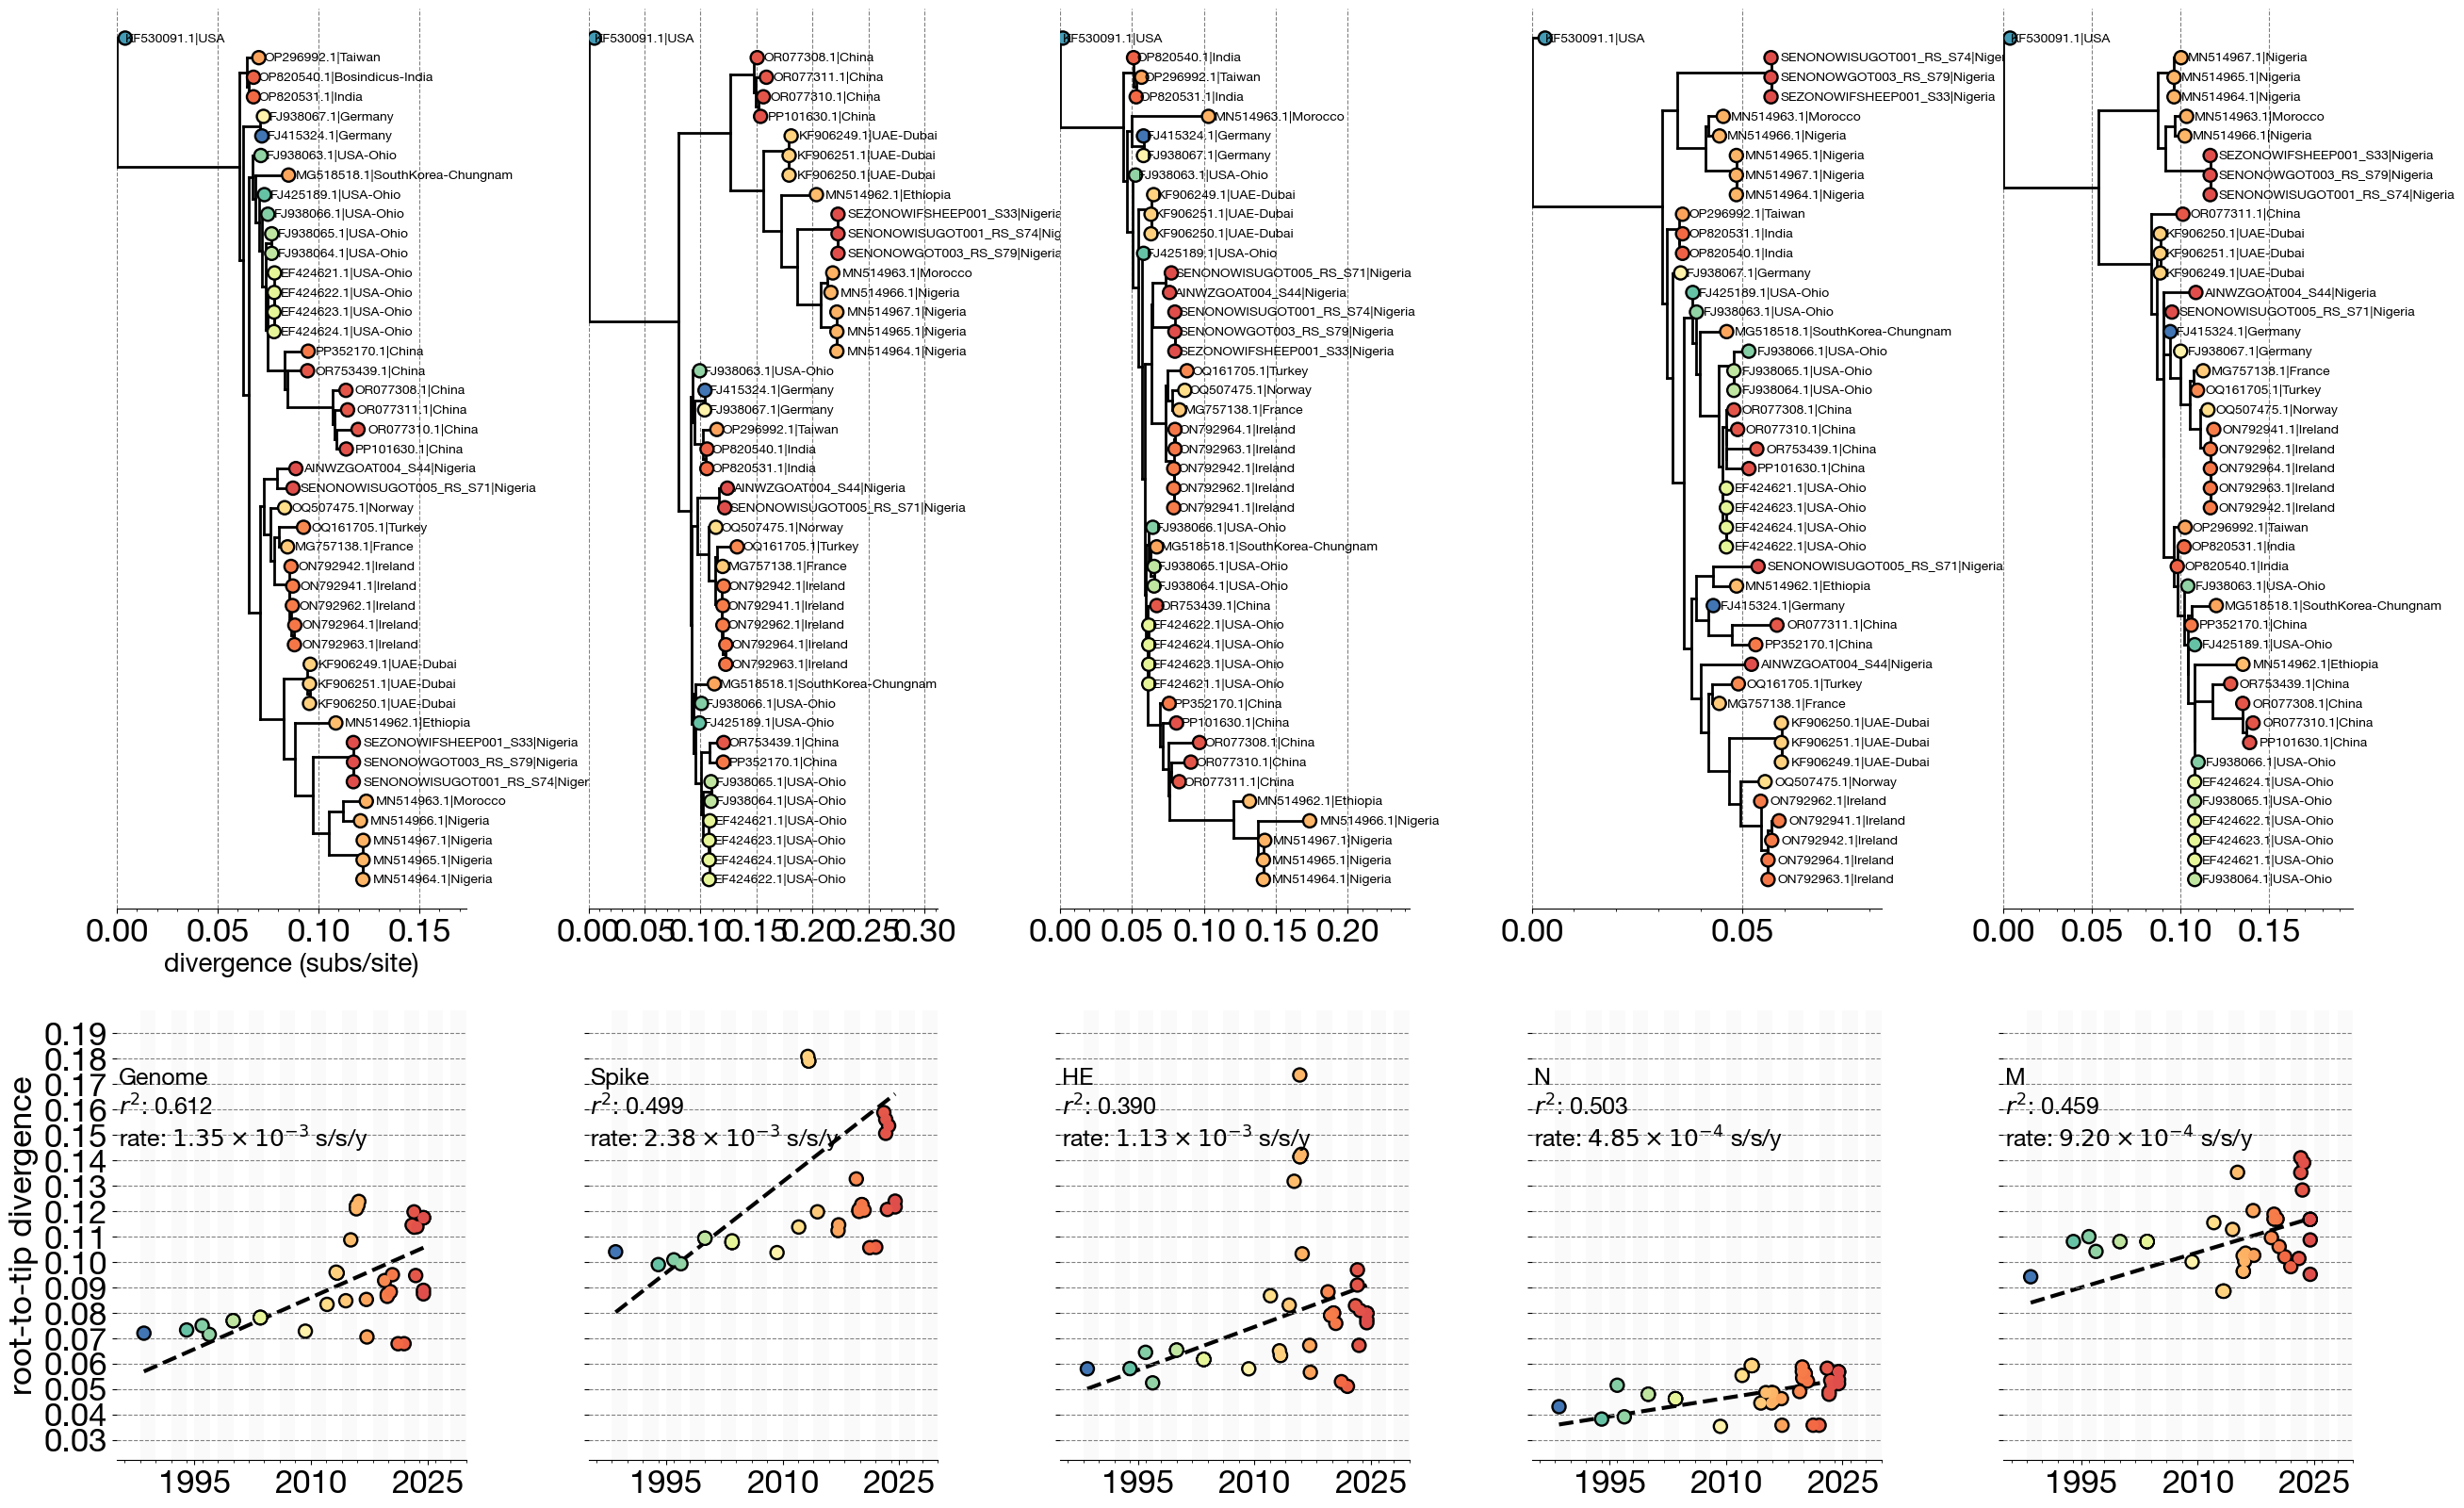

In [11]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import gridspec

import glob,os
import baltic as bt
import numpy as np

typeface='Helvetica Neue'

mpl.rcParams['font.weight']=300
mpl.rcParams['axes.labelweight']=300
mpl.rcParams['font.family']=typeface
mpl.rcParams['font.size']=25

base_path='/Users/s2059633/Downloads/BCOV/'

fig = plt.figure(figsize=(50, 25),facecolor='w') 
gs = gridspec.GridSpec(2, 8,height_ratios=[2,1],wspace=0.35,hspace=0.15) ## setup figure with two columns

segments=['Genome','Spike', 'HE', 'N', 'M']
# glob.glob(os.path.join(base_path,'*.dated.newick'))
for t,tree_path in enumerate([os.path.join(base_path,'%s.newick'%(s)) for s in segments]):
    seg=os.path.basename(tree_path).split('.')[0]
    print(seg)
    
    ax = plt.subplot(gs[0,t])
    
#     date_path=os.path.join(os.path.dirname(tree_path),'dates.csv')
    
    ll=bt.loadNewick(tree_path) ## load rooted tree
    ll.sortBranches()
    
    dates={}
    for k in ll.getExternal():
        date=k.name.split('|')[-1]
        
        if len(date.split('-'))==3:
            dates[k.name]=bt.decimalDate(date)

        elif len(date.split('-'))==2:
            yr,mon=date.split('-')
            yr,mon=int(yr),int(mon)

            nyr,nmon=yr,mon
            nmon+=1
            if nmon>12: 
                nmon=1
                nyr+=1

            dates[k.name]=[bt.decimalDate('%s-01'%(date)),bt.decimalDate('%02d-%02d-01'%(nyr,nmon))]

        elif len(date.split('-'))==1:
            dates[k.name]=[int(date),int(date)+1]
            
    
    
    

    max_date=max([max(d) if isinstance(d,list) else d for d in dates.values()])
    
#     ll.setAbsoluteTime(max_date)
#     x_attr=lambda k: k.absoluteTime
    ll.plotTree(ax)
    
    text=lambda k: '%s|%s'%(k.name.split('|')[0],k.name.split('|')[2])
    ll.addText(ax,x_attr=lambda k: 1.04*k.height,text=text,size=10,va='center',clip_on=False)

    ax.set_yticks([])
    ax.set_yticklabels([])


    ax.grid(axis='x',ls='--',color='grey')
    [ax.spines[loc].set_visible(False) for loc in ax.spines if loc not in ['bottom']]
    
    ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.05))
    
    
#     ax.set_xlim(min(dates.values()),max(dates.values()))
    ax.set_xlim(0,ll.treeHeight*1.4)
    ax.set_ylim(-1,ll.ySpan+1.0)
    ax.plot()
    
    ########################
    ax2 = plt.subplot(gs[1,t])

#     ll2=bt.loadNewick(os.path.join(os.path.dirname(tree_path),'%s.dated.newick'%(seg)))

#     tip_dates={k.name: k.absoluteTime for k in ll.getExternal()}
#     tip_heights={k.name: k.height for k in ll2.getExternal()}

    tips=ll.getExternal()
    xs=[np.mean(dates[k.name]) if isinstance(dates[k.name],list) else dates[k.name] for k in tips]
    ys=[k.height for k in tips]
    
    ##################
    from scipy.stats import linregress
    import numpy as np

    slope,intercept,rval,pval,stderr=linregress(xs,ys)

    x_grid=np.linspace(min(xs),max(xs),100)
    ax2.plot(x_grid,[slope*x+intercept for x in x_grid],lw=3,ls='--',color='k',zorder=0)
    ###################
    
    s=70
#     ax2.scatter(xs,ys,s=s,facecolor='lightgrey',edgecolor='none',zorder=100)
#     ax2.scatter(xs,ys,s=s*2,facecolor='k',edgecolor='none',zorder=99)

    ########
    cmap=mpl.cm.Spectral_r
    
    norm=mpl.colors.Normalize(1985,2030)
    
    ax2.scatter(xs,ys,s=s,facecolor=[cmap(norm(bt.decimalDate(k.name.split('|')[-1],variable=True))) for k in tips],edgecolor='none',zorder=100)
    ax2.scatter(xs,ys,s=s*2,facecolor='k',edgecolor='none',zorder=99)
    
    ll.plotPoints(ax,colour=lambda k: k.is_leaf() and cmap(norm(bt.decimalDate(k.name.split('|')[-1],variable=True))),size=s)
    
    ########
    
    fmt=lambda y: r'$%.2f\times10^{%d}$'%(y*(10**-int(np.log10(y/10))),int(np.log10(y/10)))
    
    y=0.95
    va='top'
    if seg in ['Genome','Spike', 'HE', 'N', 'M']:
        y=0.68
        va='bottom'
        
    ax2.text(0.005,y,'%s\n$r^{2}$: %.3f\nrate: %s s/s/y'%(seg,rval,fmt(slope)),size=18,zorder=1000,transform=ax2.transAxes,ha='left',va=va)
    ####################
    
#     ax2.set_xlim(ax.get_xlim())
    ax2.grid(axis='y',ls='--',color='grey')
    
    
    
    if t==0:
        ax.set_xlabel('divergence (subs/site)',size=20)
        ax2.set_xlabel('')
        ax2.set_ylabel('root-to-tip divergence')
    else:
        ax2.set_yticklabels([])
    
    everyM=15
    everym=2
    ax2.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(everym))
    ax2.xaxis.set_major_locator(mpl.ticker.MultipleLocator(everyM))
    
    [ax2.axvspan(t,t+everym,fc='k',ec='none',zorder=0,alpha=0.02) for i,t in enumerate(sorted(list(ax2.get_xticks())+list(ax2.get_xticks(minor=True)))) if i%2==0]
    
    ax2.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.01))
    
    [ax2.spines[loc].set_visible(False) for loc in ax2.spines if loc not in ['bottom']]
    
    ax2.set_xlim(1985,2030)
    ax2.set_ylim(0.022,0.199)
    
#plt.savefig('/mnt/c/Users/evogytis/repos/orthomyxo-metagenomics/manuscript/JournalOfVirology-revision1/SuppFig1_segRTT.png',bbox_inches='tight',dpi=300)
#plt.savefig('/mnt/c/Users/evogytis/repos/orthomyxo-metagenomics/manuscript/JournalOfVirology-revision1/SuppFig1_segRTT.tiff',bbox_inches='tight',dpi=100)

plt.savefig('/Users/s2059633/Downloads/BCOV/SuppFig1_segRTT.pdf',bbox_inches='tight',dpi=300)
plt.savefig('/Users/s2059633/Downloads/BCOV/SuppFig1_segRTT.eps',bbox_inches='tight',dpi=300)

plt.show()

In [53]:
# remove_sequences.py
remove_names = set()

# 1. Read the names to remove
with open("./Downloads/BCOV/Retain_name.txt") as rn:
    for line in rn:
        line = line.strip()
        if line:
            remove_names.add(line)

# 2. Filter each FASTA file
fasta_files = ["./Downloads/BCOV/Genome_BCov.fas", "./Downloads/BCOV/M_gene_BCov.fas",
               "./Downloads/BCOV/S_gene_BCov.fas", "./Downloads/BCOV/HE_gene_BCov.fas",
               "./Downloads/BCOV/N_gene_BCov.fas"]

for fasta in fasta_files:
    with open(fasta) as f_in, open(fasta.replace(".fas", ".fasta"), "w") as f_out:
        keep = True
        for line in f_in:
            if line.startswith(">"):
                # Extract the header name (minus the ">")
                header_name = line[1:].split()[0]
                # Decide if this sequence should be kept
                keep = header_name not in remove_names
            if keep:
                f_out.write(line)

In [57]:
#!/usr/bin/env python3

# 1. Read the text file into a dictionary
#    key = accession (the portion before the first "|")
#    value = the *entire* line from the text file (for renaming the sequence)
keep_dict = {}
with open("./Downloads/BCOV/Retain_name.txt") as rn:
    for line in rn:
        line = line.strip()
        if line:
            # Extract the accession (the portion before the first "|")
            accession_in_file = line.split("|", 1)[0]
            # Store a mapping: accession -> the full line
            keep_dict[accession_in_file] = line

# 2. List of input FASTA files
fasta_files = [
    "./Downloads/BCOV/Genome_BCov.fas",
    "./Downloads/BCOV/M_gene_BCov.fas",
    "./Downloads/BCOV/S_gene_BCov.fas",
    "./Downloads/BCOV/HE_gene_BCov.fas",
    "./Downloads/BCOV/N_gene_BCov.fas"
]

# 3. Filter & rename
for fasta in fasta_files:
    output_file = fasta.replace(".fas", "_retained.fasta")
    with open(fasta) as f_in, open(output_file, "w") as f_out:
        keep = False  # Will be True if current sequence should be kept
        
        for line in f_in:
            if line.startswith(">"):
                # Example header: ">KF530091.1|HCov|USA|1991-01-24"
                original_header_line = line[1:].strip()  # e.g. "KF530091.1|HCov|USA|1991-01-24"
                
                # Grab accession from the FASTA header
                accession = original_header_line.split("|", 1)[0]
                
                # Decide if we keep & rename
                if accession in keep_dict:
                    keep = True
                    # Write the new header, taken from the text file
                    new_header_line = ">" + keep_dict[accession] + "\n"
                    f_out.write(new_header_line)
                else:
                    keep = False
            else:
                # For non-header lines, just write them if keep == True
                if keep:
                    f_out.write(line)